In [11]:
import torch
import clip
import pandas as pd
import numpy as np
import os
from PIL import Image
from IPython.display import display
from tqdm.notebook import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# load images

data_location =  "./imgs"
img_dict = {}
for inx, f in enumerate(os.listdir(data_location)):
  img_dict[inx] = f
img_nums = len(img_dict)
print("There are {} images.".format(img_nums))

if img_nums == 0:
  print('no image in the folder.')

There are 31 images.


  0%|          | 0/31 [00:00<?, ?it/s]

query:


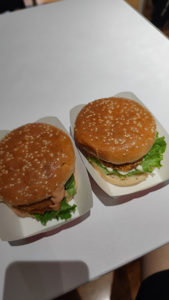

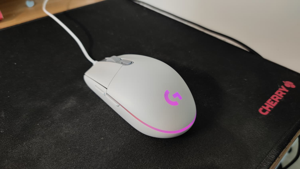

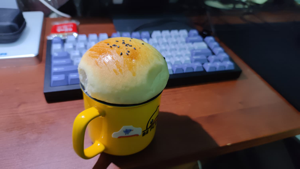

In [10]:
## Realization of text to image

# get text input from user && text encode
instr = input('Pleaze input description:')
text_input = clip.tokenize(instr).to(device)
with torch.no_grad():
  text_f = model.encode_text(text_input)
text_f /= text_f.norm(dim=-1, keepdim=True)

sim = {}
pbar = tqdm(total=img_nums)

for i in range(img_nums):
  
  image_path = f'{data_location}/{img_dict[i]}'
  img = Image.open(image_path)
  img_input = preprocess(img).unsqueeze(0).to(device)

  # image encode
  with torch.no_grad():
    img_f = model.encode_image(img_input)

  # calculate similarity
  img_f /= img_f.norm(dim=-1, keepdim=True)
  similarity = 100 * img_f @ text_f.T
  sim[i] = similarity
  pbar.update(1)

# display top3 result.
res = sorted(sim.items(), key=lambda s:s[1], reverse=True)
print(f'query:{instr}')
MAX_SIZE = (300, 300)
for i in range(3):
  image_path = f'{data_location}/{img_dict[res[i][0]]}'
  img = Image.open(image_path)
  img.thumbnail(MAX_SIZE)
  display(img)

User input image:


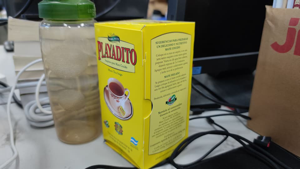

  0%|          | 0/31 [00:00<?, ?it/s]

tensor([[84.0739]])


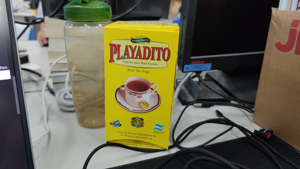

tensor([[68.3077]])


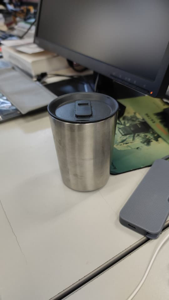

tensor([[66.9154]])


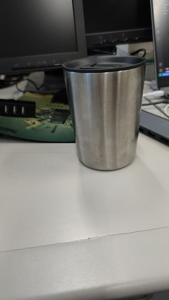

In [18]:
## Realization of image to image

MAX_SIZE = (300, 300)
# get image input from user && text encode
user_image_path = input('Pleaze input image file path:')
user_img = Image.open(user_image_path)
print('User input image:')
user_img.thumbnail(MAX_SIZE)
display(user_img)
user_img_input = preprocess(user_img).unsqueeze(0).to(device)

# user image encode
with torch.no_grad():
  user_img_f = model.encode_image(user_img_input)
user_img_f /= user_img_f.norm(dim=-1, keepdim=True)

sim = {}
pbar = tqdm(total=img_nums)

for i in range(img_nums):
  
  image_path = f'{data_location}/{img_dict[i]}'
  img = Image.open(image_path)
  img_input = preprocess(img).unsqueeze(0).to(device)

  # image encode
  with torch.no_grad():
    img_f = model.encode_image(img_input)

  # calculate similarity
  img_f /= img_f.norm(dim=-1, keepdim=True)
  similarity = 100 * img_f @ user_img_f.T
  sim[i] = similarity
  pbar.update(1)

# display top3 result.
res = sorted(sim.items(), key=lambda s:s[1], reverse=True)

for i in range(3):
  print(res[i][1])
  image_path = f'{data_location}/{img_dict[res[i][0]]}'
  img = Image.open(image_path)
  img.thumbnail(MAX_SIZE)
  display(img)